# Classifying Heart Disease

!['image.jpg'](heart.jpg)

# Table of Contents
1. [**Introduction**](#1)
2. [**Exploring the Dataset**](#2)
3. [**Feature Selection**](#3)
4. [**Model Building**](#4)
5. [**Conclusion**](#5)

<a id='1'></a>
# Introduction
The World Health Organization(WHO) estimates that 17.4 million people die from cardiovascular diseases(CVDs) every year. There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths. 

**Project Goal**      
In this project, we'll be looking at the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UCI Machine Learning Repository. The dataset has information on various characteristics including age and chest pain, to try classify the presence of heart disease in an individual. 

*Note*: The original dataset has a multi-class version of the problem, based on heart disease severity. The dataset we will be using has been reduced to a binary case. 

## Dataset

The dataset has the following features. 
* `age`: age in years
* `sex`: gender(1=male, 0=female)
* `cp`: chest pain type(1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
* `trestbps`: resting blood pressure(in mm Hg on admission to the hospital)
* `chol`: serum cholestoral in mg/dl
* `fbs`: fasting blood sugar > 120 mg/dl (1=true, 0=false)
* `restecg`: resting electrocardiographic results
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1=yes, 0=no)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
* `ca`: number of major vessels (0-3) colored by flourosopy
* `thal`: (3=normal, 6=fixed defect, 7=reversible defect)
* `present`: (0=absence of any heart disease, 1=presence of heart disease)

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<a id='2'></a>
# Exploring the Dataset

In [2]:
heart = pd.read_csv("heart_disease.csv")
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


The dataset contains `303` rows and `15` columns. The dataset seems to contain both numerical and categorical features. Let's look at the datatypes for each column.

In [4]:
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [5]:
heart.dtypes.value_counts()

int64      12
object      2
float64     1
dtype: int64

We have `13` numerical features and `2` which are of object type: `ca` and `thal`.
Let's take a closer look at the columns.

In [6]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [7]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

These columns contain numerical values, but each seem to contain the value`?` which is causing the datatypes of the columns to be `object` type. 

In [8]:
heart[heart['ca'] == '?']

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,167,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,193,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,288,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [9]:
heart[heart['thal'] == '?']

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,88,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,267,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


We have 6 rows in total that are causing this error. We will drop these rows before moving on with the analysis.

In [10]:
# drop the rows using the index
heart = heart.drop([166, 192, 287, 302, 87, 266], axis=0)
heart.shape

(297, 15)

In [11]:
heart['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

We have dropped the rows with the string inputs. Now we can convert the datatype of the columns to float. 

In [12]:
heart = heart.astype({'ca': 'float',
                     'thal': 'float'})
heart.dtypes.value_counts()

int64      12
float64     3
dtype: int64

The dataset now contains numerical datatypes. 
We will drop the `Unnamed: 0` column which is reflecting the row indexes, before proceeding to take a closer look at the rest of the columns we have. 

In [13]:
heart.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


**Insights**    
* The average age of patients is ~`54` years.
* the median for `chol` is `4.35` mg/dl lower than the mean. 

Let's take a closer look at the distribution of the outcome variable. 

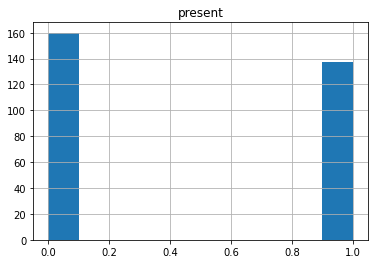

In [15]:
heart.hist('present')
plt.show()

There is almost an equal number of cases and non-cases in the dataset. We will plot histograms to see the distribution of the different categories in the encoded 'categorical' variables.

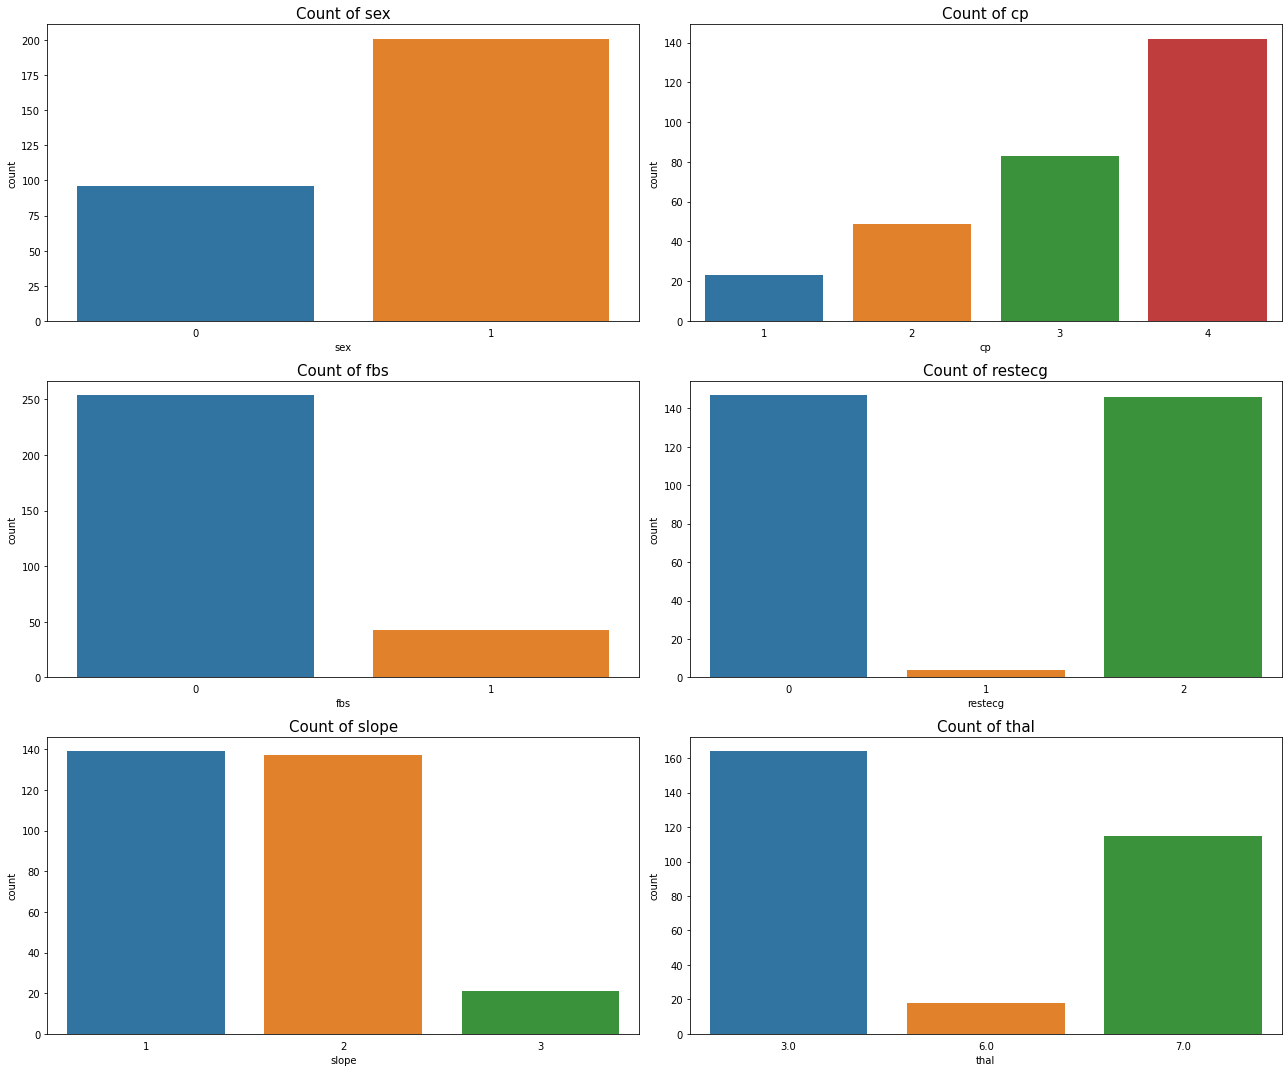

In [16]:
encoded = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']

fig = plt.figure(figsize=(18,15))

for idx, col in enumerate(encoded):
    ax = plt.subplot(3, 2, idx+1)
    sns.countplot(x=heart[col], ax=ax)
    # remove the ticks
    ax.tick_params(bottom=False)
    ax.set_title(f'Count of {col}', size=15)
fig.tight_layout() 
plt.show()

In [17]:
heart['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

**Insights**     
* The dataset is highly skewed towards the male patients. 
* A majority of the patients have asymptomatic chest pains. 
* `43` patients have fasting blood sugar > 120 mg/dl, while `254` have fbs < 120mg/dl.
* `164` patients show signs of a normal heart, `18` have a fixed defect, `115` have a reversible defect.

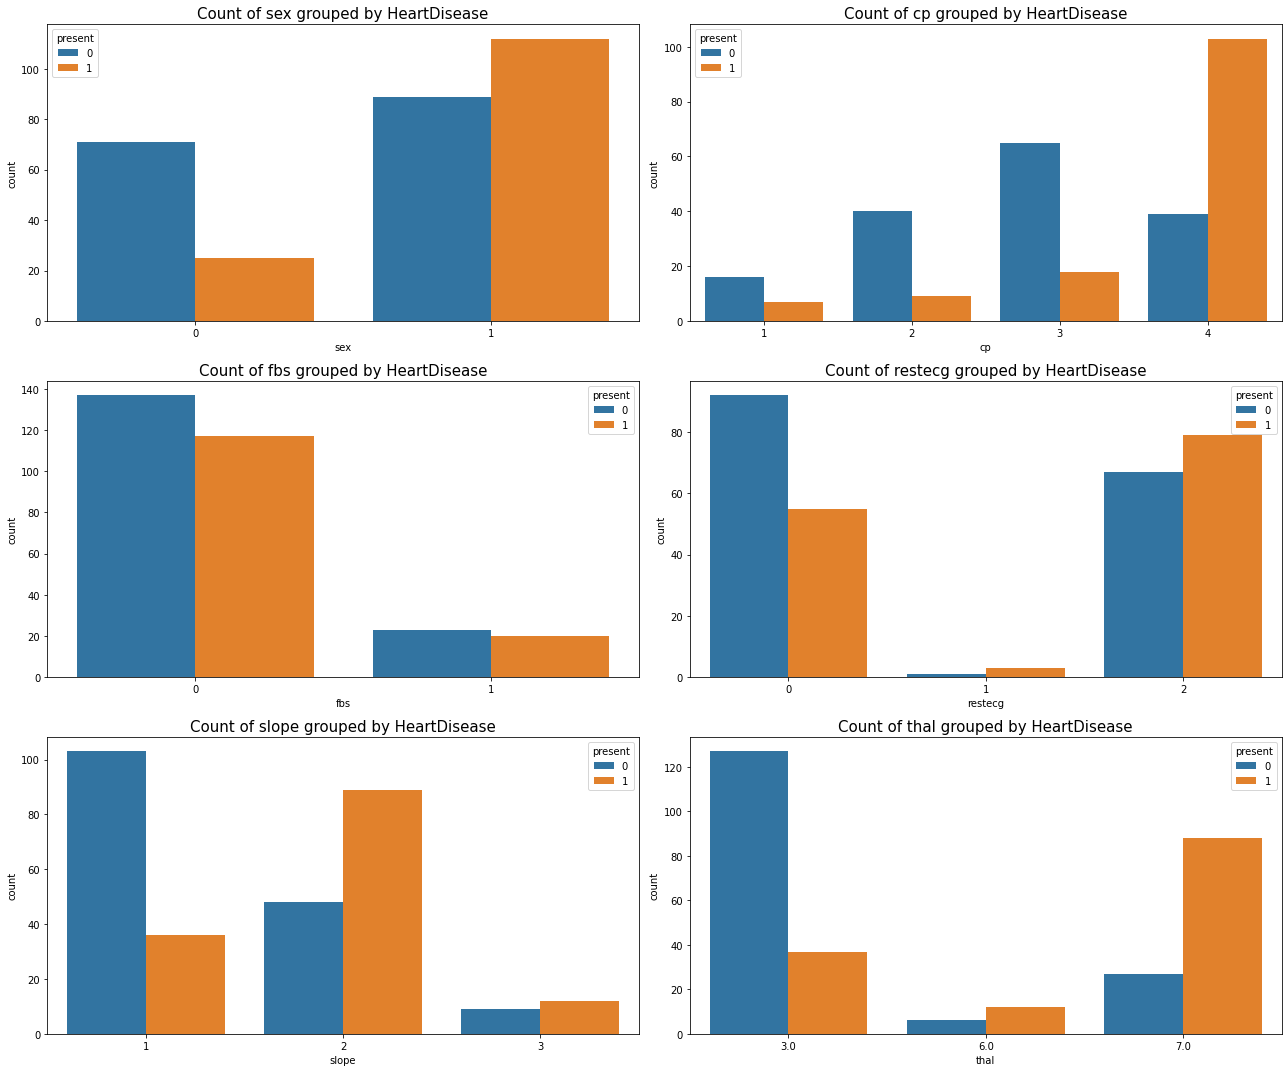

In [18]:
fig = plt.figure(figsize=(18,15))

for idx, col in enumerate(encoded):
    ax = plt.subplot(3, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=heart[col], hue=heart['present'], ax=ax)
    ax.set_title(f'Count of {col} grouped by HeartDisease', size=15)
fig.tight_layout() 
plt.show()

* We can further observe how skewed the dataset is towards male patients. Only `24` female patients in the dataset have been diagnosed with heart disease. 
* A significant number of patients with asymptomatic chest pain have heart disease. 
* A significant number of patients with a flat slope was diagnosed with a heart disease.

<a id='3'></a>
# Feature Selection
We will stratify the variables we have by heart disease to see if we have a meaningful difference in the distribution of the predictors. 

In [19]:
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem line good candidates for predictors: 
* `age`
* `ca`
* `thalach`
* `restecg`


## Dividing the Data
We'll use a 70-30 split of the dataset for the training and test sets.

In [20]:
X = heart[["age", "thalach", "restecg", "ca"]]
y = heart['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

In [21]:
# checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  111
Y_train:  96
Y_test:  49
Y_test:  41


Both cases and non-cases are available in both our training and test sets. We are now ready to build the model.

<a id='4'></a>
# Model Building


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.7681159420289855
Training Sensitivity:  0.6979166666666666
Training Specificity:  0.8288288288288288


Overall the training `accuracy` was about `76%`, the `sensitivity` was `69%`, and the `specificity` was `82%`.         
Based on these metrics, the model seems to perform better for non-cases.

## Interpreting Model Coefficients

In [24]:
coefs = ["age", "thalach", "restecg", "ca"]

# log-odds
for coef, val in zip(coefs, model.coef_[0]):
    print(f"{coef}: {round(val, 3)}")

age: -0.023
thalach: -0.036
restecg: 0.14
ca: 1.19


In [25]:
# odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 0.98
thalach : 0.96
restecg : 1.15
ca : 3.29


* Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
* Resting ECG and the number of colored vessels are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 47% increase and 225% (!) increase).

## Model Evaluation

In [26]:
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.7555555555555555
Test Sensitivity:  0.5853658536585366
Test Specificity:  0.8979591836734694


<a id='5'></a>
# Conclusion
Test accuracy was 75%, sensitivity was 58%, and specificity was 89%. Compared to the training set, the accuracy didn't change much, while the model fared better with cases and worse with non-cases. This is potentially useful since this application is health-based.

We might be more interested in being better at identifying cases than non-cases.